In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import plotly.express as px
import pandas as pd
from sklearn import preprocessing
import warnings            
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv('crime_update.csv')
df.head()

,Incident ID,Offence Code,CR Number,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,City,...,Beat,PRA,Address Number,Street Name,Street Type,Start_Date_Time,Latitude,Longitude,Police District Number,Location
0,201202980,3550,180042096,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,GERMANTOWN,...,5N1,447,12800.0,MIDDLEBROOK,RD,08/23/2018 09:52:00 PM,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,BETHESDA,...,200,54,8300.0,WOODMONT,AVE,03/30/2018 01:01:00 AM,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,BETHESDA,...,200,54,8300.0,WOODMONT,AVE,03/30/2018 01:01:00 AM,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,GAITHERSBURG,...,6P2,445,400.0,QUINCE ORCHARD,RD,06/14/2018 10:26:00 PM,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,CHEVY CHASE,...,20,17,4800.0,FALSTONE,AVE,09/02/2018 11:30:00 PM,38.966174,-77.096561,2D,"(38.9662, -77.0966)"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306094 entries, 0 to 306093
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident ID             306094 non-null  int64  
 1   Offence Code            306094 non-null  object 
 2   CR Number               306094 non-null  int64  
 3   NIBRS Code              306094 non-null  object 
 4   Victims                 306094 non-null  int64  
 5   Crime Name1             305822 non-null  object 
 6   Crime Name2             305822 non-null  object 
 7   Crime Name3             305822 non-null  object 
 8   Police District Name    306000 non-null  object 
 9   City                    304818 non-null  object 
 10  State                   306094 non-null  object 
 11  Zip Code                302915 non-null  float64
 12  Agency                  306094 non-null  object 
 13  Place                   306094 non-null  object 
 14  Sector              

In [4]:
label_encoder = preprocessing.LabelEncoder()
df['Crime Name1']= label_encoder.fit_transform(df['Crime Name1'])

In [5]:
df.drop(['Incident ID'], axis=1,inplace = True)
df.drop(['NIBRS Code'], axis=1,inplace = True)
df.drop(['Crime Name2'], axis=1,inplace = True)


In [6]:
df.drop(['Crime Name3'], axis=1,inplace = True)
df.drop(['City'], axis=1,inplace = True)
df.drop(['Street Name'], axis=1,inplace = True)
df.drop(['Street Type'], axis=1,inplace = True)
df.drop(['Start_Date_Time'], axis=1,inplace = True)
df['Police District Number']= label_encoder.fit_transform(df['Police District Number'])

In [7]:
df['Police District Name']= label_encoder.fit_transform(df['Police District Name'])
df['State']= label_encoder.fit_transform(df['State'])
df['Agency']= label_encoder.fit_transform(df['Agency'])

In [8]:
df

,Offence Code,CR Number,Victims,Crime Name1,Police District Name,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Latitude,Longitude,Police District Number,Location
0,3550,180042096,1,2,2,6,20874.0,2,Street - In vehicle,N,5N1,447,12800.0,39.177744,-77.265619,8,"(39.1777, -77.2656)"
1,3522,180015424,1,2,0,6,20814.0,2,Street - In vehicle,E,200,54,8300.0,38.992693,-77.097063,2,"(38.9927, -77.0971)"
2,3562,180015424,1,2,0,6,20814.0,2,Street - In vehicle,E,200,54,8300.0,38.992693,-77.097063,2,"(38.9927, -77.0971)"
3,3520,180029476,1,2,3,6,20878.0,0,Hotel/Motel/Etc.,P,6P2,445,400.0,39.147954,-77.218189,10,"(39.148, -77.2182)"
4,2204,180043926,1,1,0,6,20815.0,2,Residence - Single Family,E,20,17,4800.0,38.966174,-77.096561,2,"(38.9662, -77.0966)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306089,1399,210006666,1,0,3,6,20886.0,2,Residence -Townhouse/Duplex,R,6R2,544.0,19300.0,39.172701,-77.197340,10,"(39.1727, -77.1973)"
306090,2305,210017101,1,1,8,6,20906.0,2,Parking Lot - Residential,K,4K2,333.0,12500.0,39.059672,-77.075995,6,"(39.0597, -77.076)"
306091,5016,210016952,1,2,2,6,20874.0,2,Residence - Apartment/Condo,N,5N1,465.0,300.0,39.199722,-77.273038,8,"(39.1997, -77.273)"
306092,9099,210009468,1,2,6,6,20910.0,2,Street - Other,G,3G1,92.0,7700.0,38.985813,-77.022915,4,"(38.9858, -77.0229)"


In [9]:
df.drop(['Place'], axis=1,inplace = True)
df['Sector']= label_encoder.fit_transform(df['Sector'])
df.drop(['Beat'], axis=1,inplace = True)

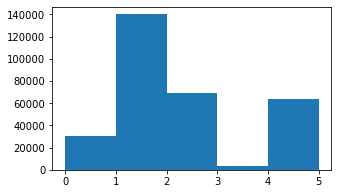

In [10]:
fig, ax = plt.subplots(figsize =(5, 3))
ax.hist(df['Crime Name1'],bins=5)
plt.show()

In [11]:
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

Offence Code              0
CR Number                 0
Victims                   0
Crime Name1               0
Police District Name      0
State                     0
Zip Code                  0
Agency                    0
Sector                    0
PRA                       0
Address Number            0
Latitude                  0
Longitude                 0
Police District Number    0
Location                  0
dtype: int64

In [13]:
df

,Offence Code,CR Number,Victims,Crime Name1,Police District Name,State,Zip Code,Agency,Sector,PRA,Address Number,Latitude,Longitude,Police District Number,Location
0,3550,180042096,1,2,2,6,20874.0,2,11,447,12800.0,39.177744,-77.265619,8,"(39.1777, -77.2656)"
1,3522,180015424,1,2,0,6,20814.0,2,3,54,8300.0,38.992693,-77.097063,2,"(38.9927, -77.0971)"
2,3562,180015424,1,2,0,6,20814.0,2,3,54,8300.0,38.992693,-77.097063,2,"(38.9927, -77.0971)"
3,3520,180029476,1,2,3,6,20878.0,0,12,445,400.0,39.147954,-77.218189,10,"(39.148, -77.2182)"
4,2204,180043926,1,1,0,6,20815.0,2,3,17,4800.0,38.966174,-77.096561,2,"(38.9662, -77.0966)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306089,1399,210006666,1,0,3,6,20886.0,2,13,544.0,19300.0,39.172701,-77.197340,10,"(39.1727, -77.1973)"
306090,2305,210017101,1,1,8,6,20906.0,2,8,333.0,12500.0,39.059672,-77.075995,6,"(39.0597, -77.076)"
306091,5016,210016952,1,2,2,6,20874.0,2,11,465.0,300.0,39.199722,-77.273038,8,"(39.1997, -77.273)"
306092,9099,210009468,1,2,6,6,20910.0,2,4,92.0,7700.0,38.985813,-77.022915,4,"(38.9858, -77.0229)"


In [14]:
from sklearn.model_selection import train_test_split

X= df[['CR Number','Crime Name1','Police District Name','Police District Number']]
y=df['Victims']

In [15]:
X

,CR Number,Crime Name1,Police District Name,Police District Number
0,180042096,2,2,8
1,180015424,2,0,2
2,180015424,2,0,2
3,180029476,2,3,10
4,180043926,1,0,2
...,...,...,...,...
306089,210006666,0,3,10
306090,210017101,1,8,6
306091,210016952,2,2,8
306092,210009468,2,6,4


In [16]:
y

0         1
1         1
2         1
3         1
4         1
         ..
306089    1
306090    1
306091    1
306092    1
306093    1
Name: Victims, Length: 276851, dtype: int64

In [17]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [18]:
prediction=logmodel.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99     81444
           2       0.00      0.00      0.00      1380
           3       0.00      0.00      0.00       163
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1

    accuracy                           0.98     83056
   macro avg       0.12      0.12      0.12     83056
weighted avg       0.96      0.98      0.97     83056



In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)
print("Accuracy score of test dataset:  ",accuracy_score(y_test,prediction))


Accuracy score of test dataset:   0.9805914082065113
